In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('Combined_Data_New.csv')
data.drop(['Lat','Lon'],axis=1,inplace = True)

In [8]:
data.head()

,Reg.No,Reg.Date,First Party,Second Party,Property Address,Area(sq m),Deed Type,Property Type,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,9,2015-08-22,RAJKUMAR GUPTA,SANJAY KUMAR SHARMA,"House No. B-3/96 GROUND FLOOR,Safdarjung Enclave",160.000000,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2015,8,22,5,234,34,3
1,23,2015-08-22,SATISH KUMAR JHAMB,PATRICK CHRISTOPHER LOUGHRAN,"House No. B-1/25 SECOND FLOOR,Safdarjung Enclave",65.031587,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2015,8,22,5,234,34,3
2,24,2015-08-22,KHEM CHAND BAKSHI,SASANKA RAJ DEKA,"House No. B-4/153 FIRST FLOOR,Safdarjung Enclave",102.192493,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2015,8,22,5,234,34,3
3,29,2015-08-22,ANUPAMAA SETH,SAMA CONSULTANCY SERVICE LLP THOUGH AUTH. SIGN...,"House No. A-2/145 FIRST FLOOR,Safdarjung Enclave",181.438127,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2015,8,22,5,234,34,3
4,47,2015-08-22,SMT. MONICA GOGIA,SHRI. SUDHANSHU MALHOTRA,"House No. B-6/70 SAFDARJUNG ENCLAVE ND, Road N...",195.652174,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential,2015,8,22,5,234,34,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 15 columns):
Reg.No              1540 non-null int64
Reg.Date            1540 non-null object
First Party         1540 non-null object
Second Party        1540 non-null object
Property Address    1540 non-null object
Area(sq m)          1540 non-null float64
Deed Type           1540 non-null object
Property Type       1540 non-null object
year                1540 non-null int64
month               1540 non-null int64
day                 1540 non-null int64
dayofweek           1540 non-null int64
dayofyear           1540 non-null int64
weekofyear          1540 non-null int64
quarter             1540 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 180.5+ KB


### Some tuples in Property Type column are wrongly labelled i.e "Residentia"

In [12]:
for i in range(0,len(data)):
    if data['Property Type'][i] == 'Residentia':
        data['Property Type'][i] = 'Residential'
        
    

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Year wise data 

In [70]:
data['year'].value_counts() # Total documents registered in each year

2018    424
2017    423
2016    384
2019    185
2015    124
Name: year, dtype: int64

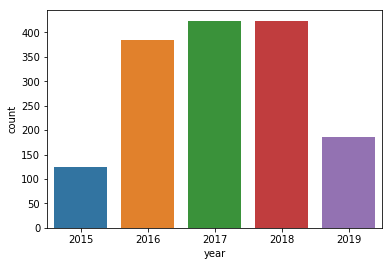

In [20]:
sns.countplot(data['year'])

## Total documents registered in each year

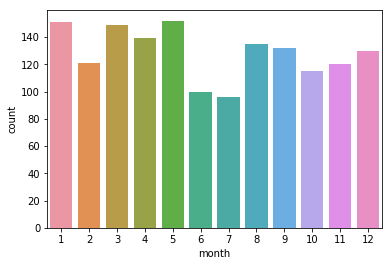

In [54]:
sns.countplot(data['month'])

#### In month June and July has least registration.

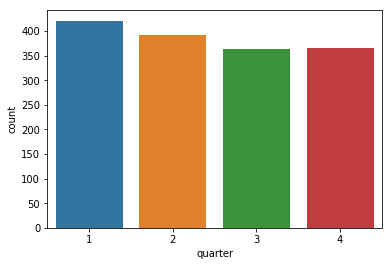

In [55]:
sns.countplot(data['quarter'])

#### In 1st quarter of year we are getting slightly higer registration among all four quarters.

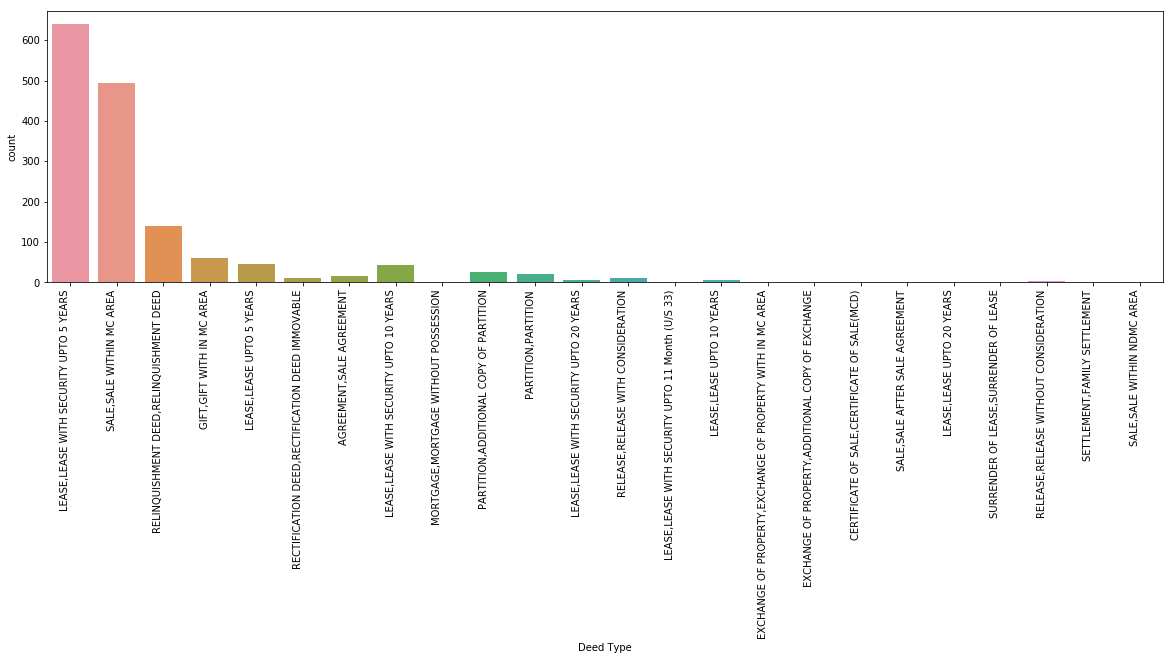

In [69]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Deed Type',data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

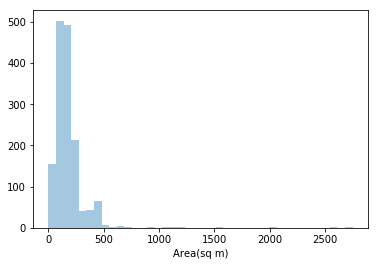

In [33]:
sns.distplot(data['Area(sq m)'], bins=40, kde=False)

# Bar Plots

In [61]:
data[['year','Area(sq m)']].groupby(by='year',as_index=False).sum()

,year,Area(sq m)
0,2015,20327.031742
1,2016,67479.749347
2,2017,76052.276579
3,2018,73124.810958
4,2019,36559.270292


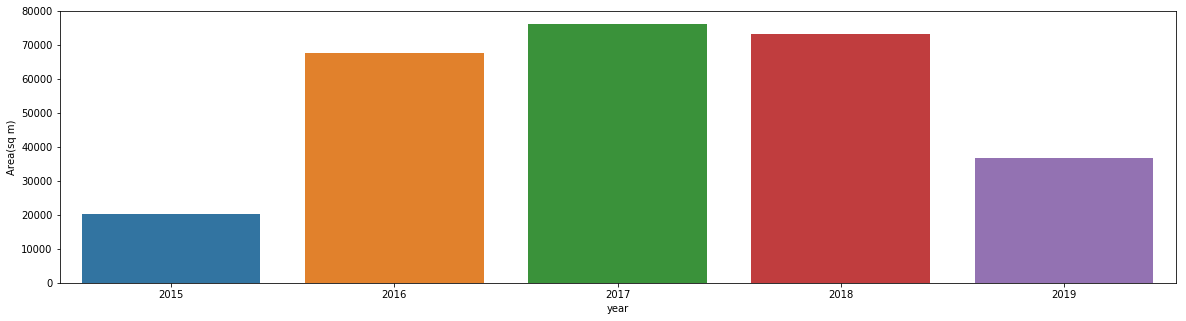

In [65]:
plt.figure(figsize=(20,5))
sns.barplot(x='year',y='Area(sq m)',data=data[['year','Area(sq m)']].groupby(by='year',as_index=False).sum())

#### Distribution of Area of land registered among all Year.

In [63]:
data[['Property Type','Area(sq m)']].groupby(by='Property Type',as_index=False).sum()

,Property Type,Area(sq m)
0,Agriculture,1.000000
1,Commercial,19963.271034
2,Others,33.440000
3,Residential,253545.427883


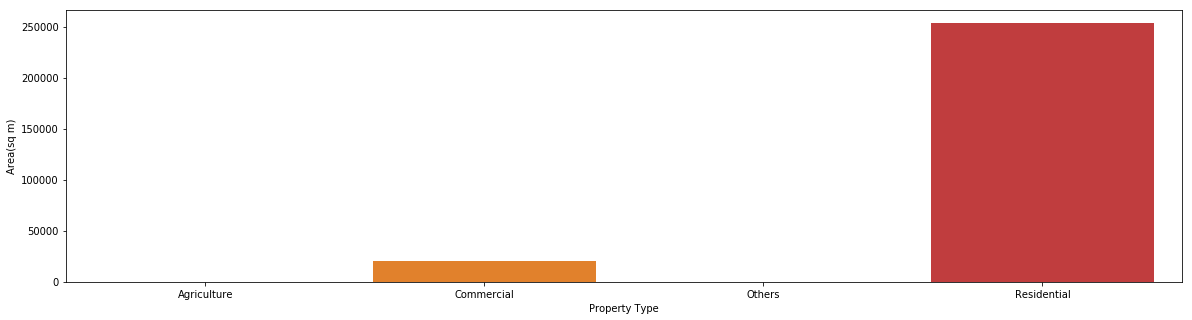

In [66]:
plt.figure(figsize=(20,5))
sns.barplot(x='Property Type',y='Area(sq m)',data=data[['Property Type','Area(sq m)']].groupby(by='Property Type',as_index=False).sum())

In [67]:
data[['Deed Type','Area(sq m)']].groupby(by='Deed Type',as_index=False).sum()

,Deed Type,Area(sq m)
0,"AGREEMENT,SALE AGREEMENT",2169.640352
1,"CERTIFICATE OF SALE,CERTIFICATE OF SALE(MCD)",216.000000
2,"EXCHANGE OF PROPERTY,ADDITIONAL COPY OF EXCHANGE",0.000000
3,"EXCHANGE OF PROPERTY,EXCHANGE OF PROPERTY WITH...",104.515050
4,"GIFT,GIFT WITH IN MC AREA",9698.767151
5,"LEASE,LEASE UPTO 10 YEARS",851.427031
6,"LEASE,LEASE UPTO 20 YEARS",8.547009
7,"LEASE,LEASE UPTO 5 YEARS",7609.658378
8,"LEASE,LEASE WITH SECURITY UPTO 10 YEARS",11791.043378
9,"LEASE,LEASE WITH SECURITY UPTO 11 Month (U/S 33)",237.224080


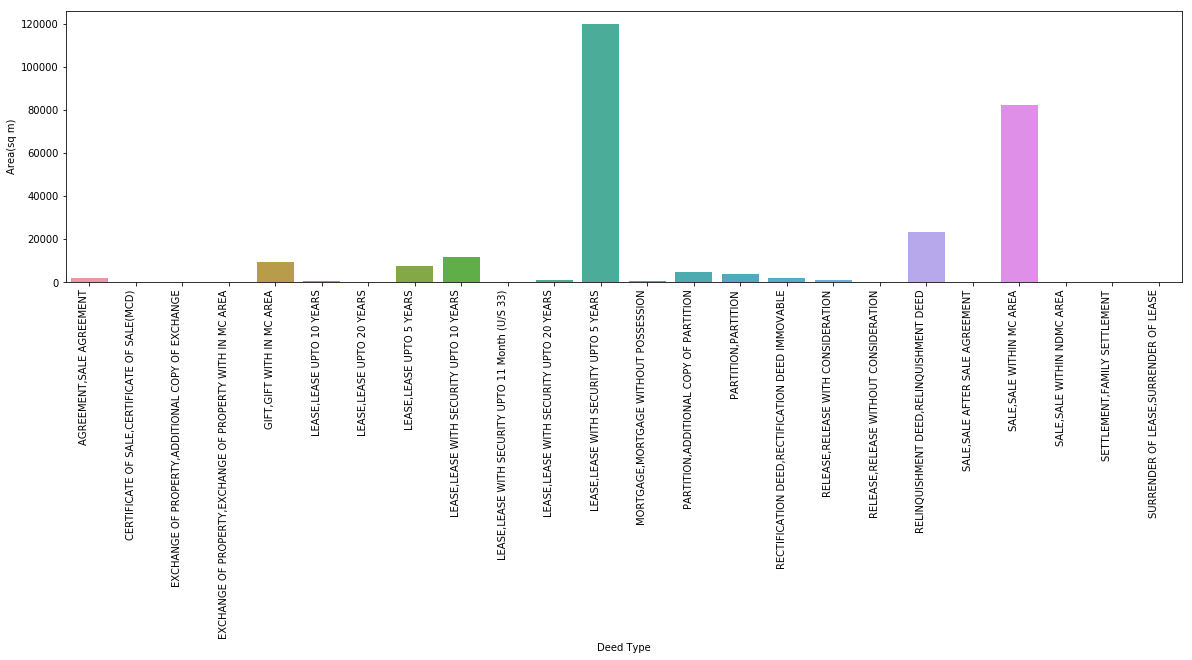

In [68]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='Deed Type',y='Area(sq m)',data=data[['Deed Type','Area(sq m)']].groupby(by='Deed Type',as_index=False).sum())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

#### Total sum of Area for each Year

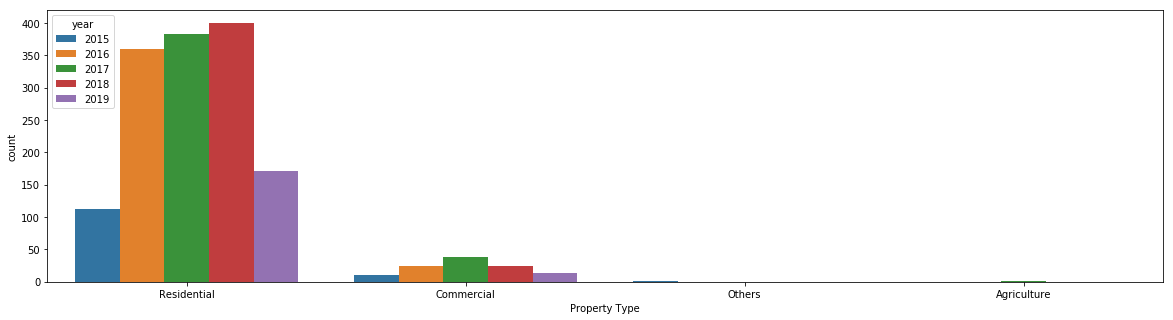

In [38]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Property Type", hue="year", data=data)

#### Count of each Property Type  for each Year

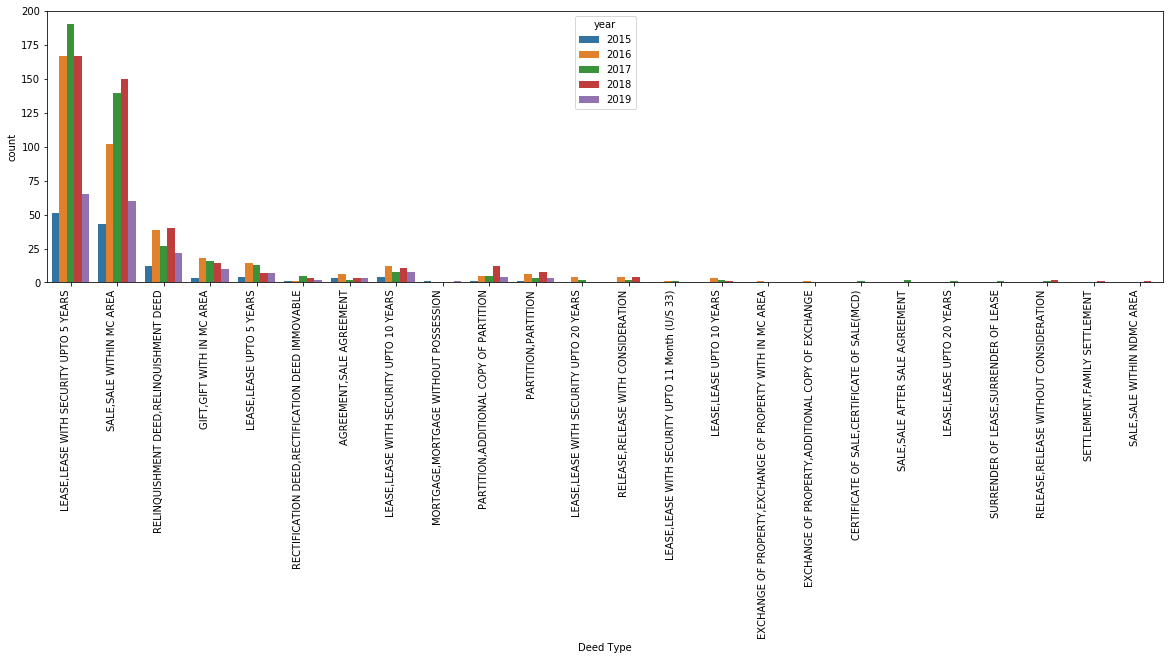

In [37]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Deed Type", hue="year", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Count of each Deed Type  for each Year
#### We can see that 'LEASE,LEASE WITH SECURITY UPTO 5 YEARS' has maximum counts among all deed type